In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams["figure.figsize"] = 15, 5
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [36]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
#checking for null
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

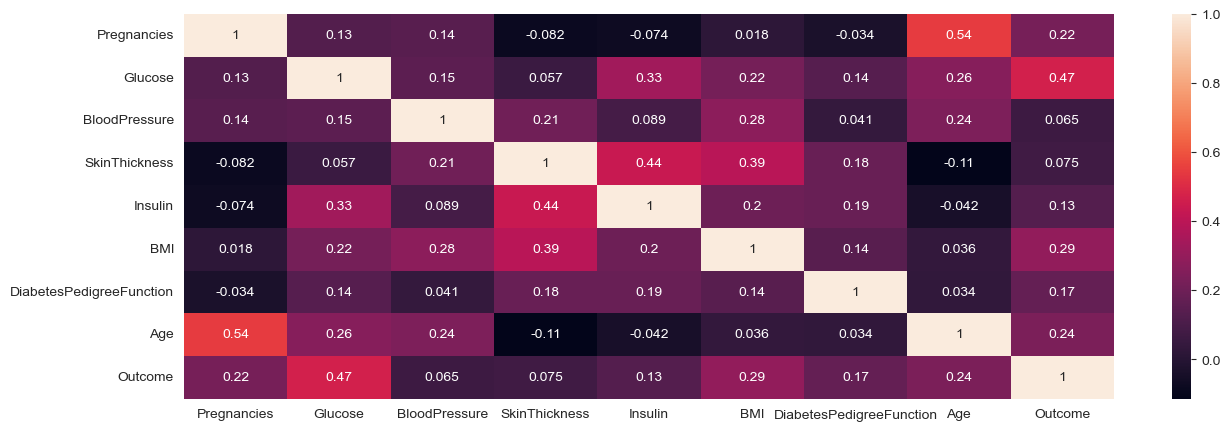

In [40]:
sns.heatmap(diabetes.corr(), annot=True)
plt.show()

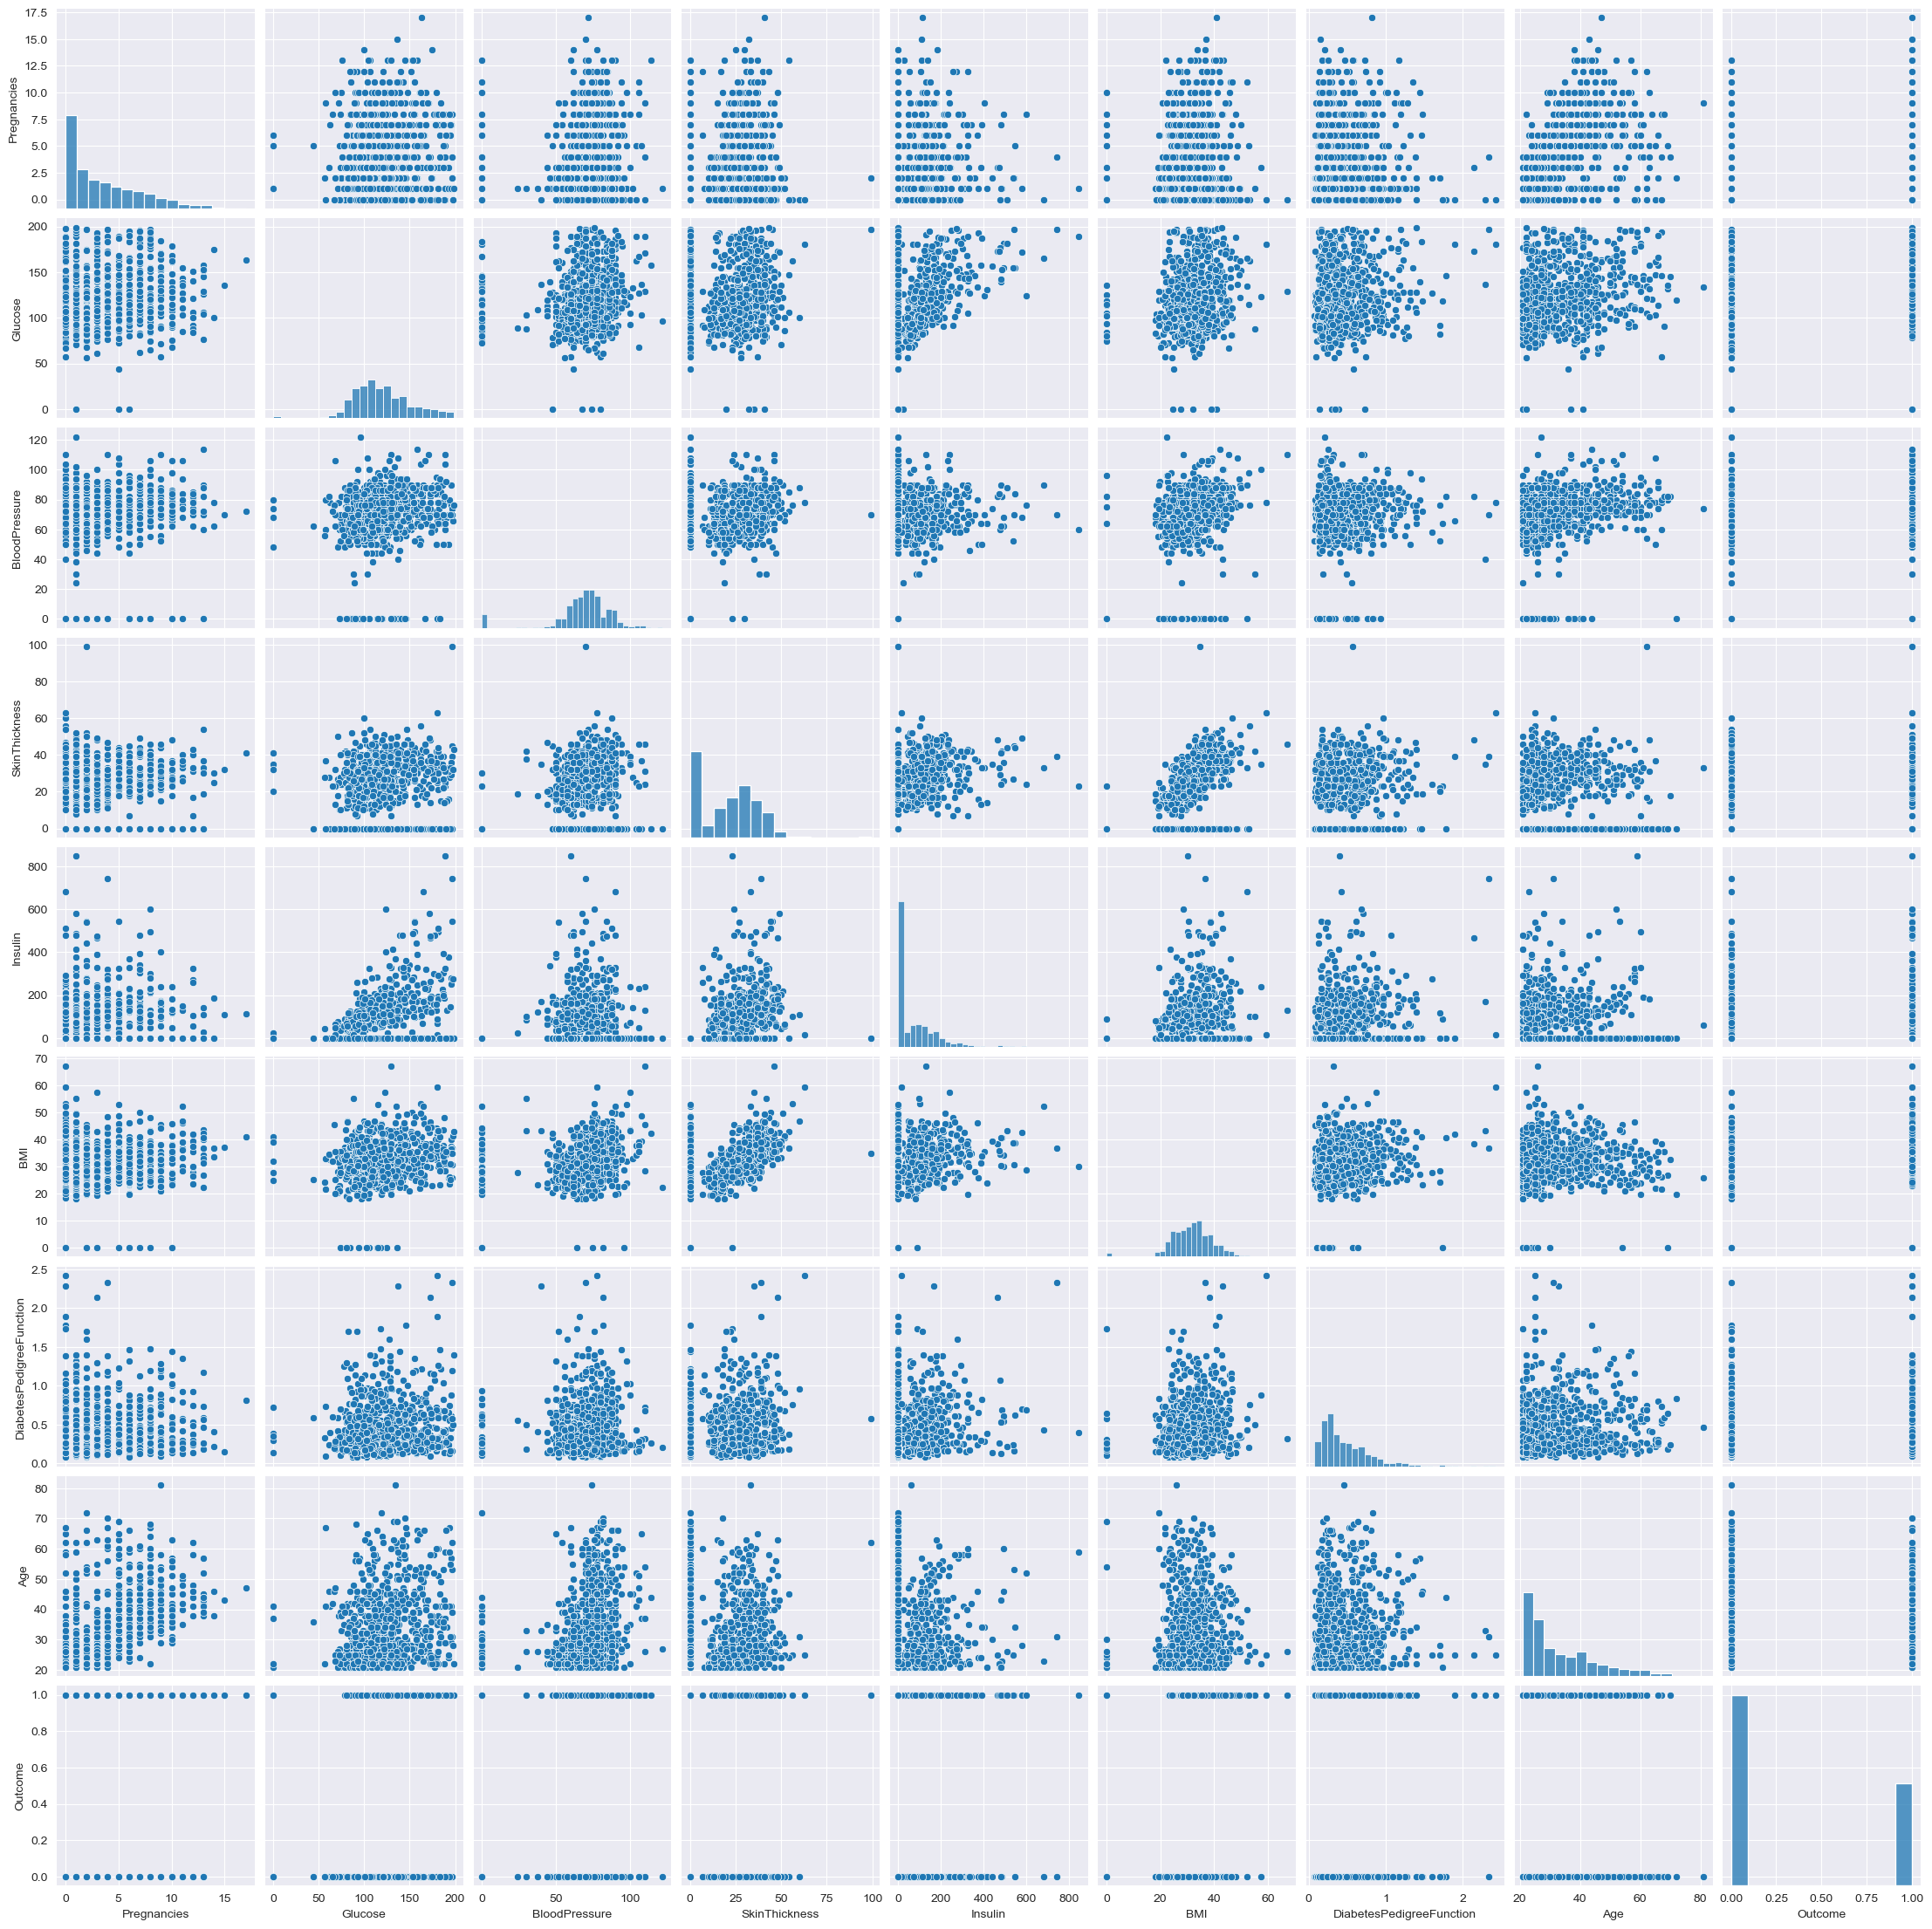

In [41]:
sns.pairplot(diabetes)
plt.show()

In [42]:
diabetes["Glucose"].info

<bound method Series.info of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64>

In [43]:
diabetes_copy = diabetes.copy(deep = True)
diabetes_copy["Glucose"] = diabetes_copy["Glucose"].replace(0,np.NaN)
diabetes_copy["BloodPressure"] = diabetes_copy["BloodPressure"].replace(0,np.NaN)
diabetes_copy["SkinThickness"] = diabetes_copy["SkinThickness"].replace(0,np.NaN)
diabetes_copy["Insulin"] = diabetes_copy["Insulin"].replace(0,np.NaN)
diabetes_copy["BMI"] = diabetes_copy["BMI"].replace(0,np.NaN)

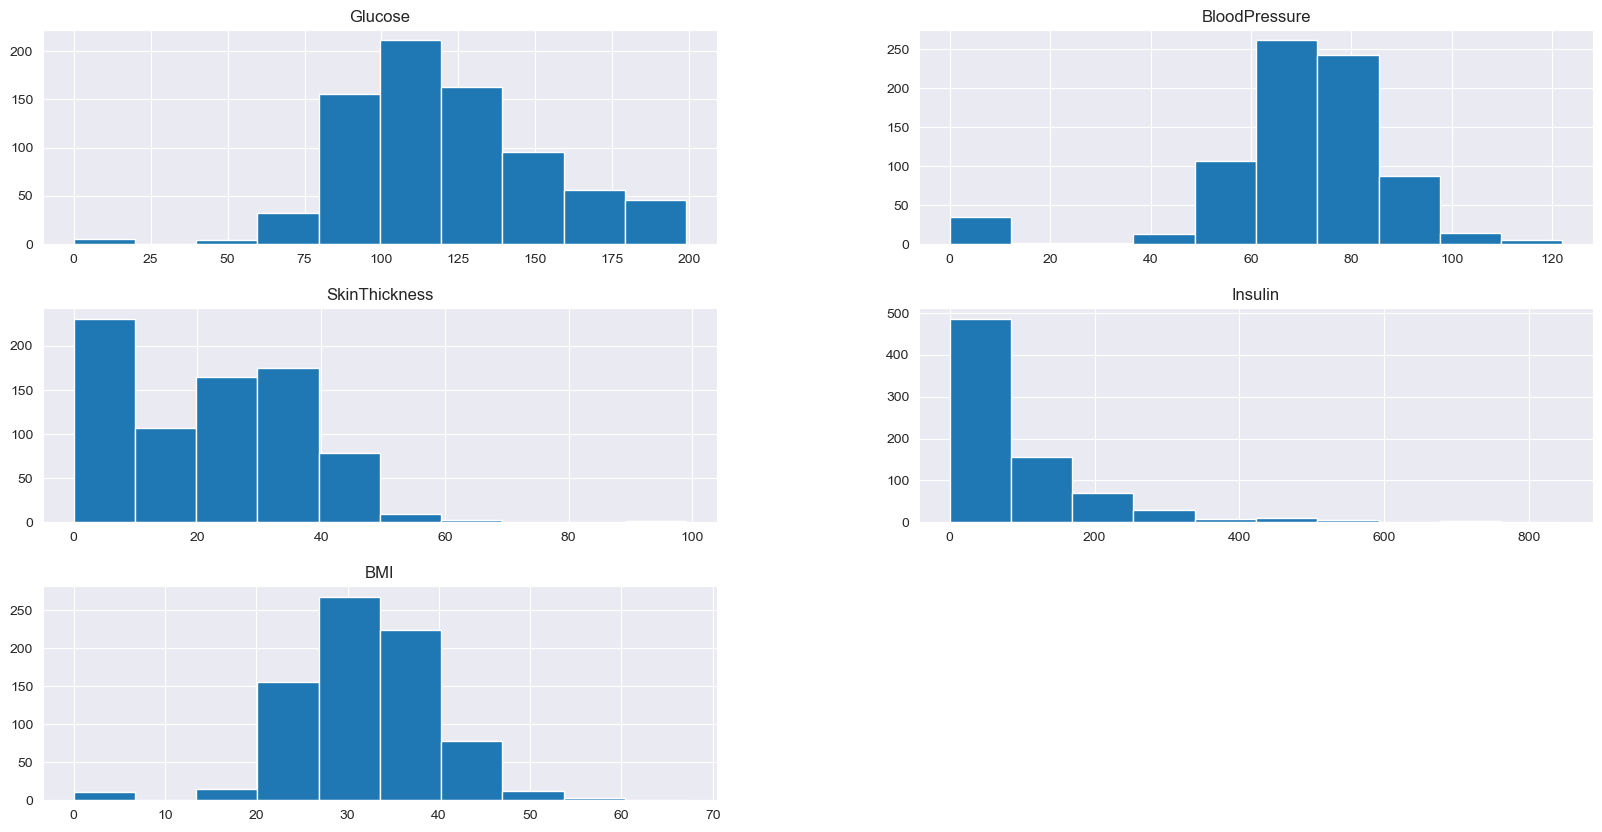

In [44]:
#checking original data distribution befor replacing with zeroes
diabetes[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].hist(figsize=(20,10))
plt.show()

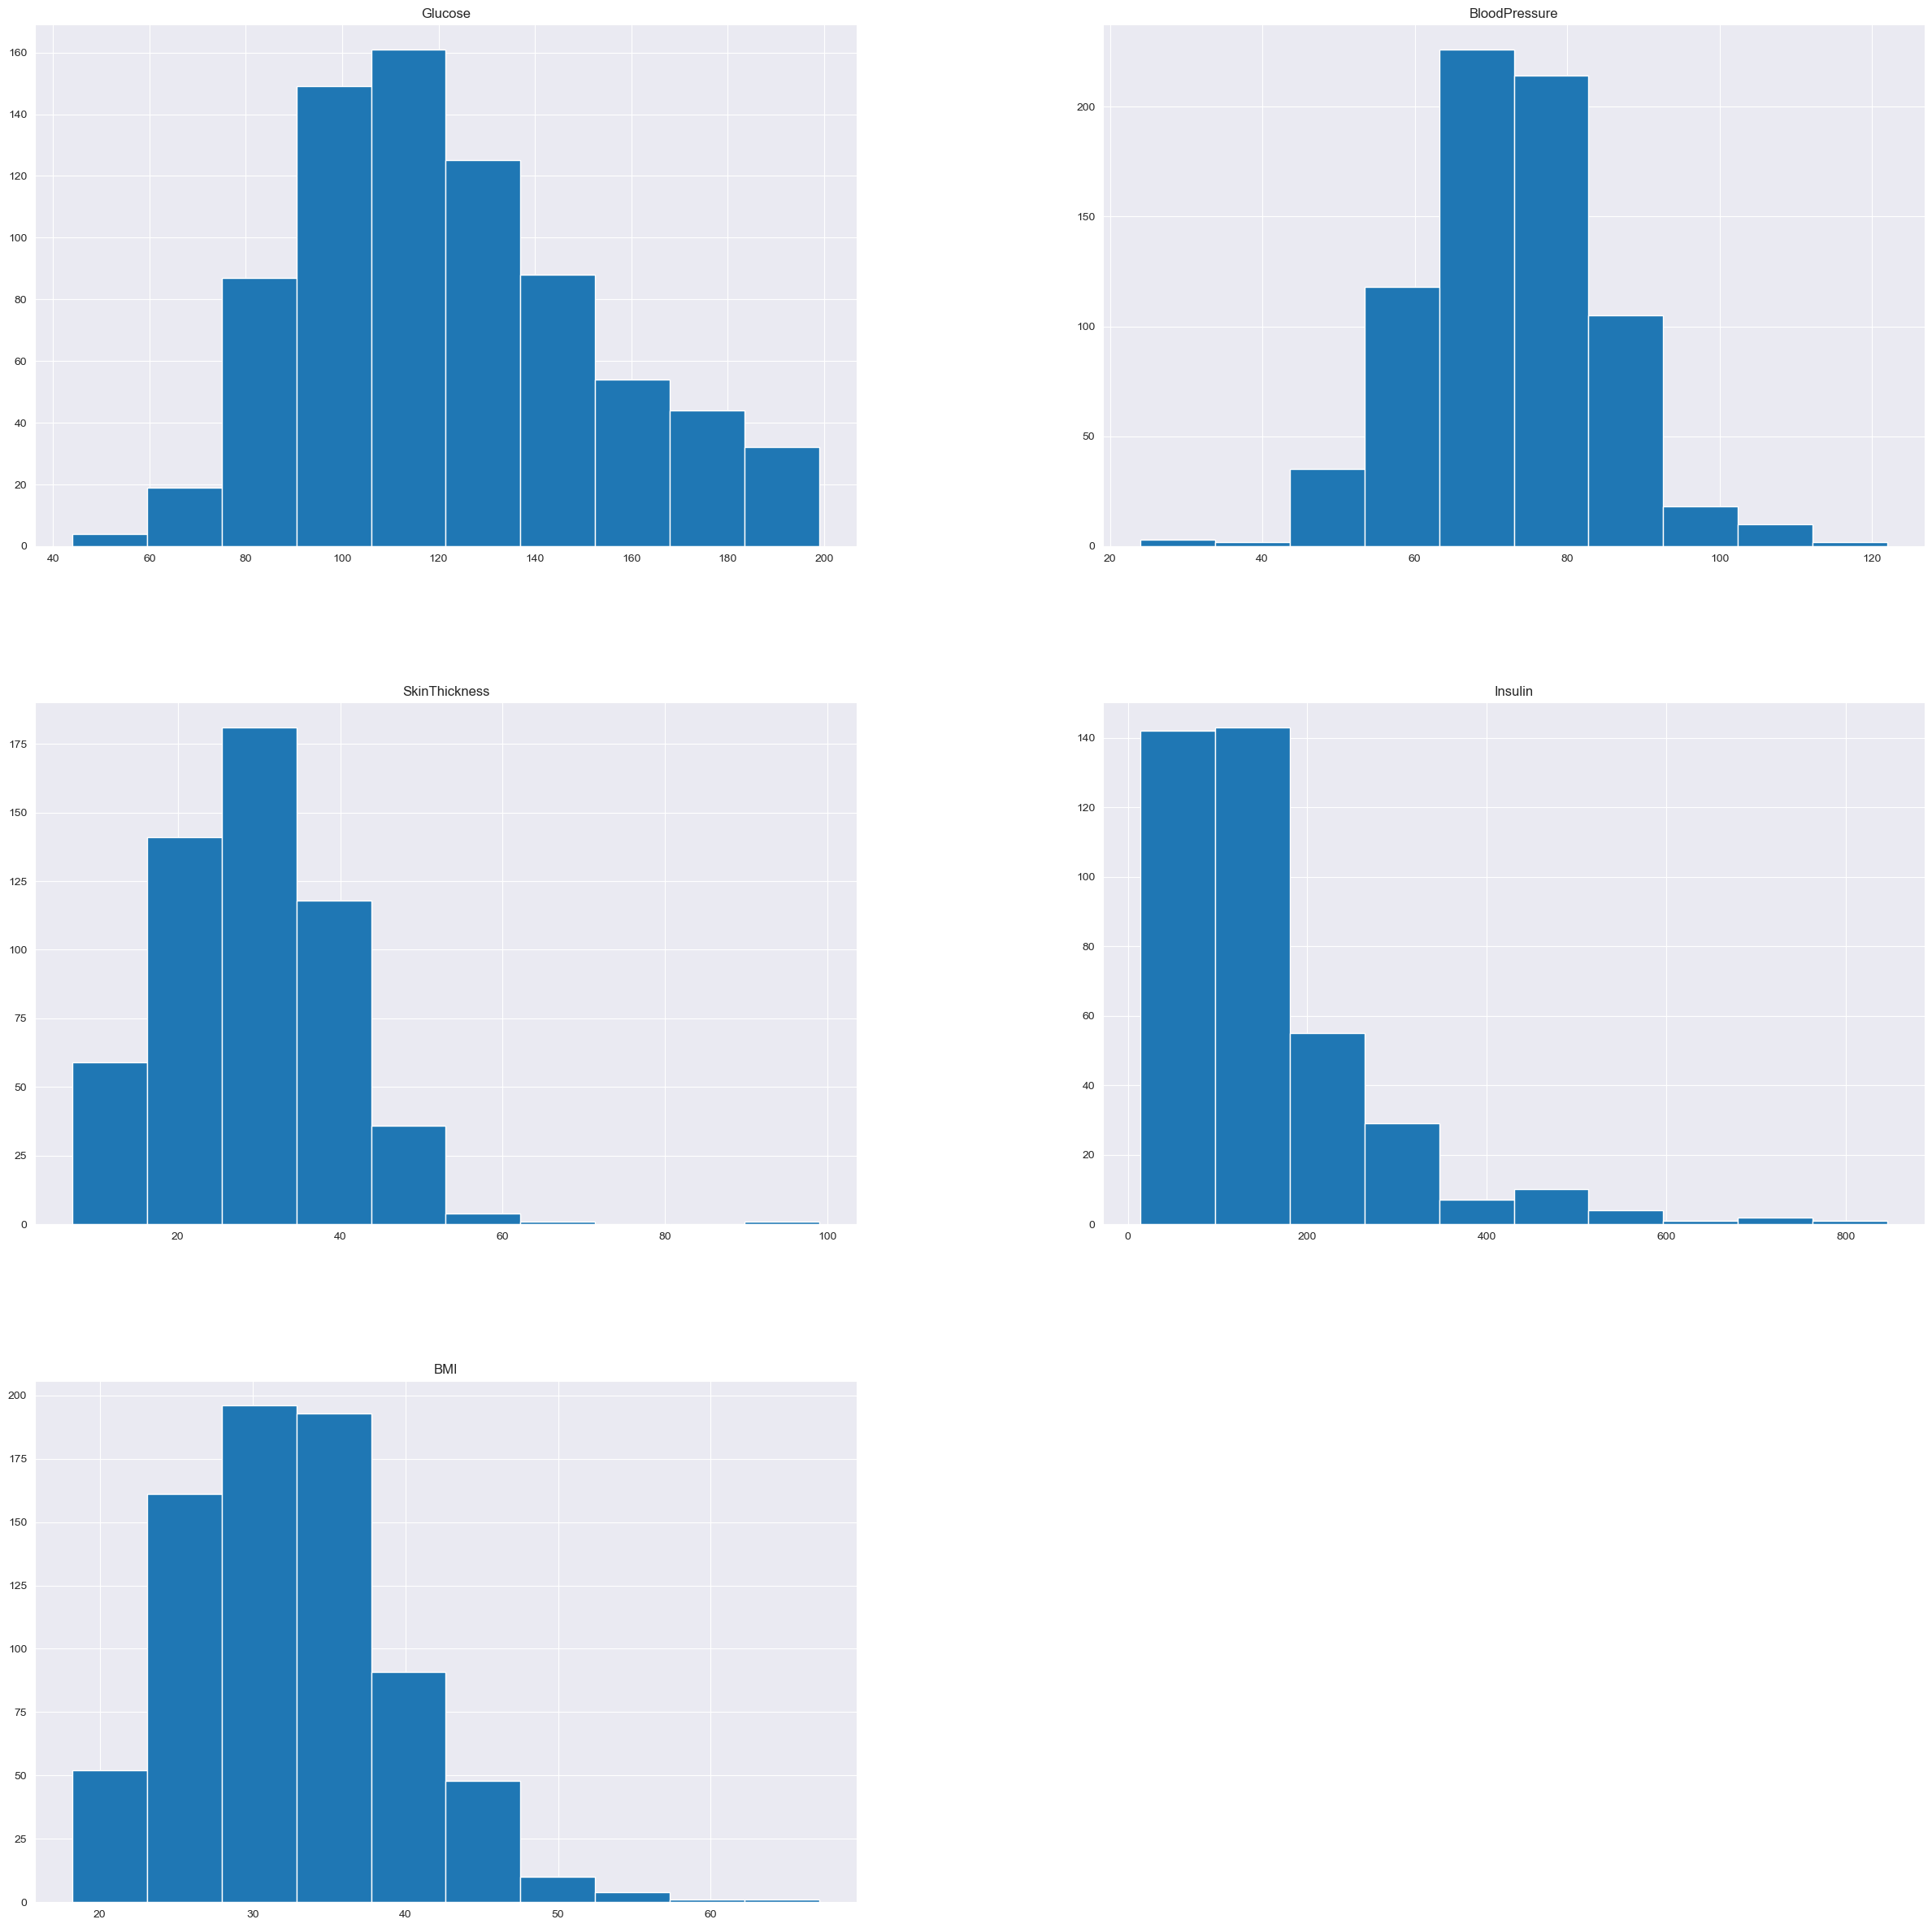

In [45]:
diabetes_copy[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].hist(figsize=(30,30))
plt.show()

In [46]:
diabetes_copy["Glucose"].fillna(diabetes_copy["Glucose"].mean(), inplace = True)
diabetes_copy["BloodPressure"].fillna(diabetes_copy["BloodPressure"].mean(), inplace = True)
diabetes_copy["SkinThickness"].fillna(diabetes_copy["SkinThickness"].median(), inplace = True)
diabetes_copy["Insulin"].fillna(diabetes_copy["Insulin"].median(), inplace = True)
diabetes_copy["BMI"].fillna(diabetes_copy["BMI"].median(), inplace = True)

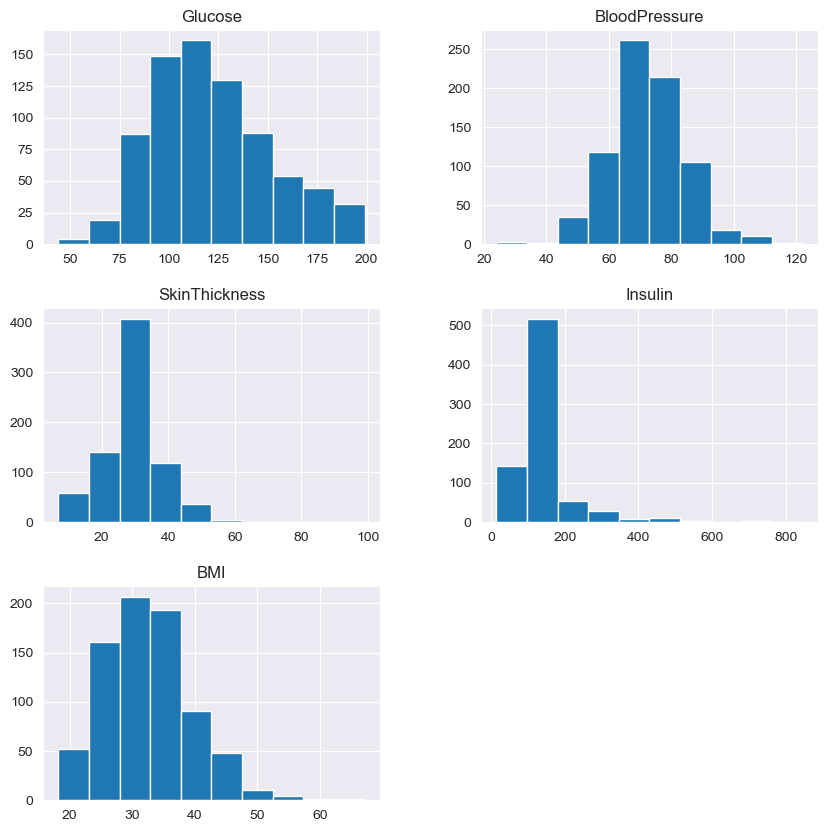

In [47]:
diabetes_copy[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].hist(figsize=(10,10))
plt.show()

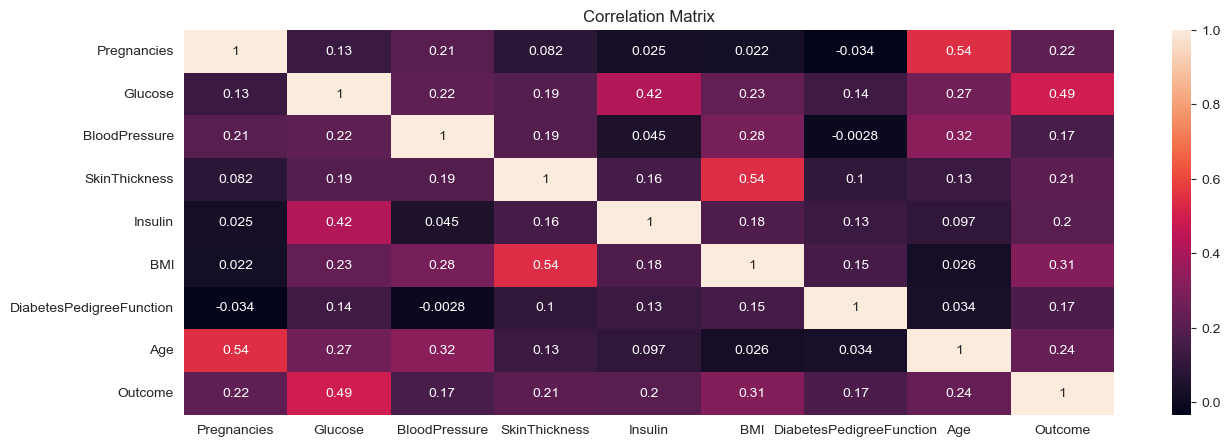

In [48]:
sns.heatmap(diabetes_copy.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

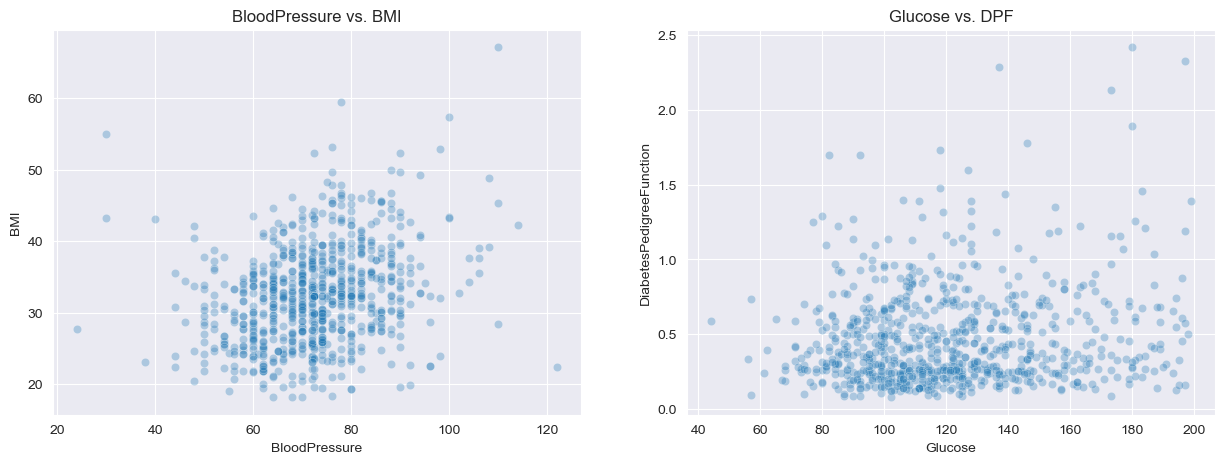

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
sns.scatterplot(x = "BloodPressure", y = "BMI", data = diabetes_copy, alpha = 0.3, ax = axes[0])
axes[0].set_title("BloodPressure vs. BMI")
sns.scatterplot(x="Glucose", y="DiabetesPedigreeFunction", data = diabetes_copy, alpha=0.3, ax=axes[1])
axes[1].set_title("Glucose vs. DPF")
plt.show()

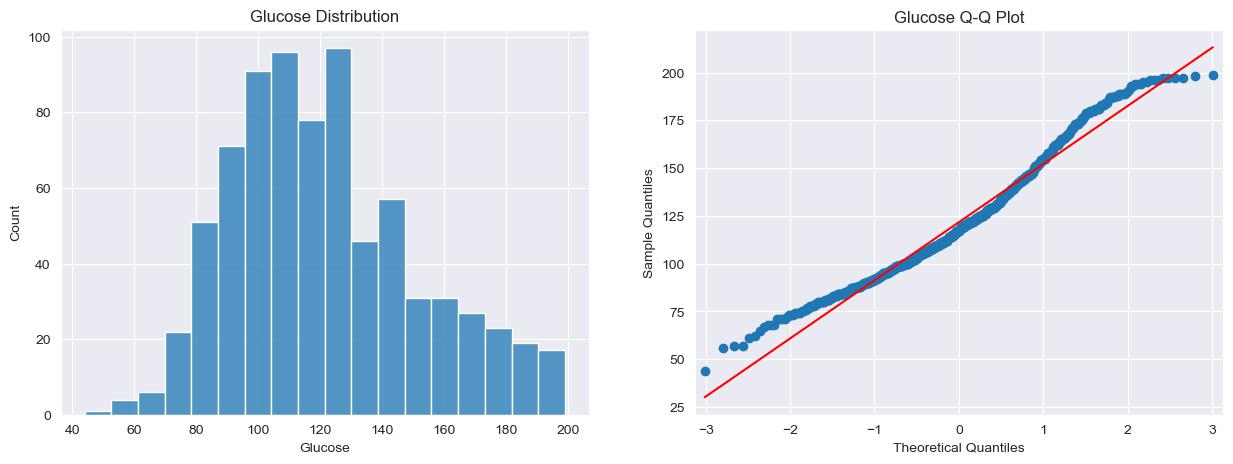

Shapiro-Wilk: 
w:0.9699020385742188, p-value:1.7770054525079182e-11

Kolmogorov-Smirnov: 
d:0.9699020385742188, p-value:0.0

Skewness of the data: 
0.531677628850459



In [50]:
import statsmodels.api as sm
import scipy
import pylab

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.histplot(diabetes_copy["Glucose"], ax = axes[0])
axes[0].set_title("Glucose Distribution")

sm.qqplot(diabetes_copy["Glucose"], line = "s", ax = axes[1])
axes[1].set_title("Glucose Q-Q Plot")

pylab.show()

w, p_val = scipy.stats.shapiro(diabetes_copy["Glucose"])
print("Shapiro-Wilk: \nw:{}, p-value:{}\n".format(w,p_val))
d, p_val = scipy.stats.kstest(diabetes_copy["Glucose"], "norm")
print("Kolmogorov-Smirnov: \nd:{}, p-value:{}\n".format(w,p_val))

print("Skewness of the data: \n{}\n".format(scipy.stats.skew(diabetes_copy["Glucose"])))

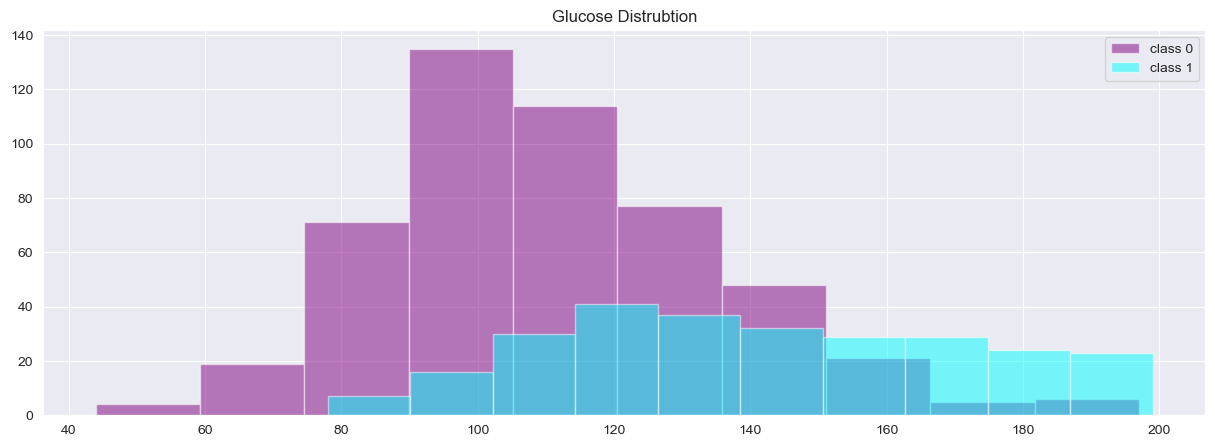

In [51]:
class_zero = diabetes_copy[(diabetes_copy["Outcome"]== 0)]
class_one = diabetes_copy[(diabetes_copy["Outcome"] == 1)]

plt.hist(x = class_zero["Glucose"],color = "purple", label = "class 0", alpha = 0.5)
plt.hist(x = class_one["Glucose"], color = "cyan",label = "class 1", alpha = 0.5)
plt.legend()
plt.title("Glucose Distrubtion")

plt.show()

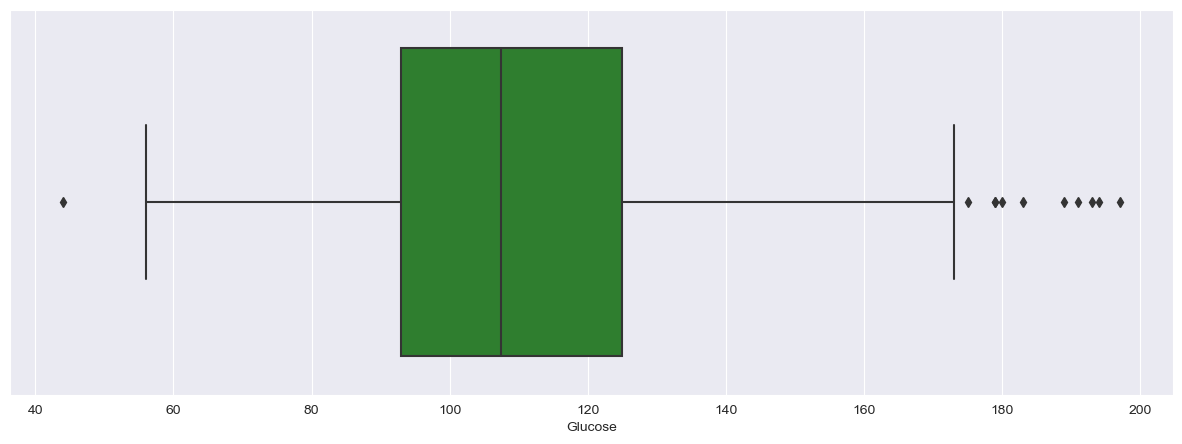

In [71]:
sns.boxplot(x = class_zero["Glucose"], color = "forestgreen")

plt.show()

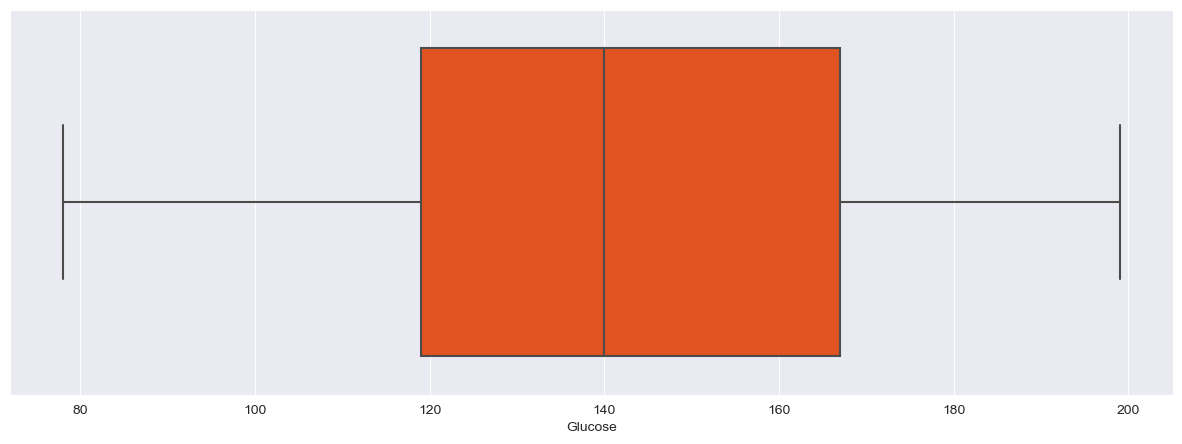

In [73]:
sns.boxplot(x = class_one["Glucose"], color = "orangered")
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

x = diabetes_copy.drop("Outcome", axis = 1)
y = diabetes_copy["Outcome"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(data = x_scaled, columns=x.columns)


In [55]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [56]:
x.info

<bound method DataFrame.info of      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1      -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2       1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3      -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4      -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.680125       0.297376       2.150354  0.455573  0.064737   
764    -0.547919  0.010298      -0.198965      -0.239949 -0.181541  0.632365   
765     0.342981 -0.022579      -0.033518      -0.695245 -0.332132 -0.910418   
766    -0.844885  0.141808      -1.026200      -0.012301 -0.181541 -0.342790   
767    -0.844885 -0.943143      -0.198965       0.215347 -0.181541 -0.299127   

     Di

In [57]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-3.301757e-16,6.966722e-16,-1.795800e-16,4.416317e-17,2.815312e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541850e+00,4.102655e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


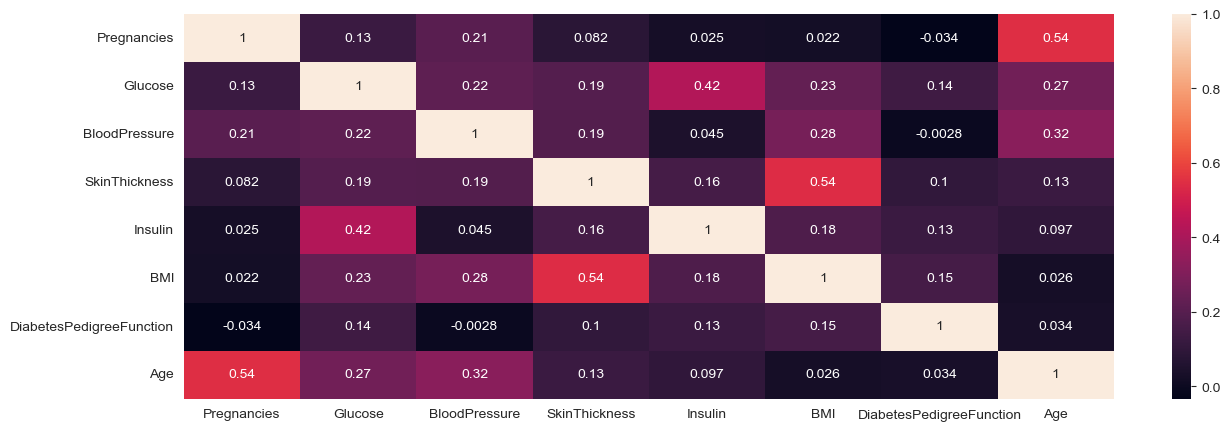

In [58]:
sns.heatmap(x.corr(), annot=True)
plt.show()

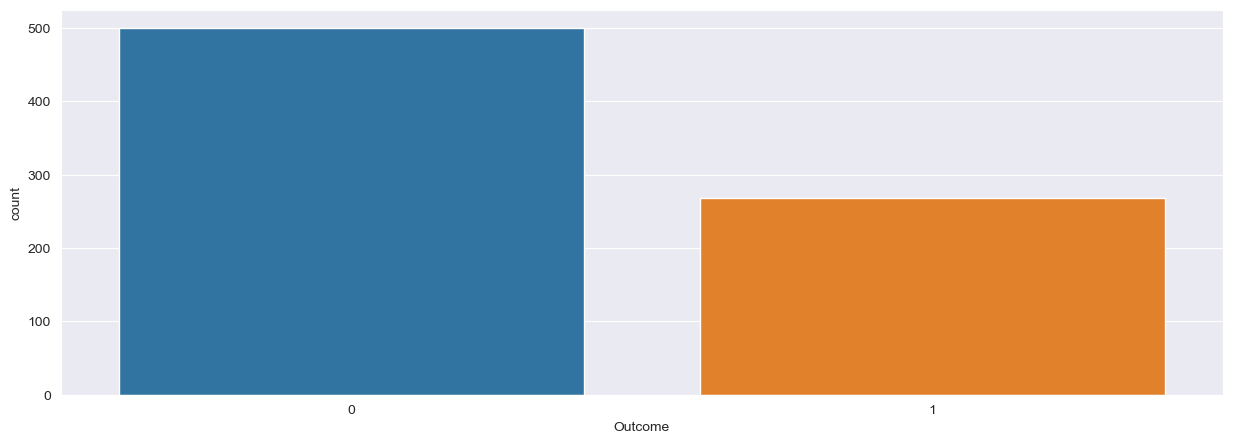

In [59]:
sns.countplot(x = diabetes_copy["Outcome"])
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify=y, random_state=42)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

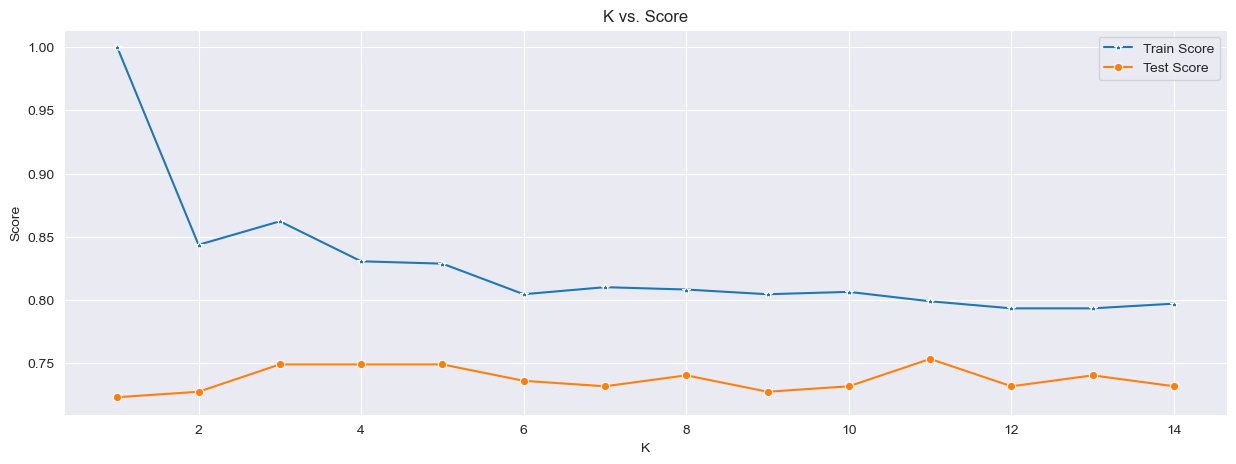

In [62]:
sns.lineplot(x = range(1,15), y = train_scores, marker = "*", label = "Train Score")
sns.lineplot(x = range(1,15), y = test_scores, marker = "o", label = "Test Score")
plt.title("K vs. Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.show()

In [63]:
knn = KNeighborsClassifier(11)
knn.fit(x_train, y_train)
knn.score(x_test,y_test)

0.7532467532467533

In [64]:
#testing with k=6
knn2 = KNeighborsClassifier(6)
knn2.fit(x_train, y_train)
knn2.score(x_test,y_test)

0.7359307359307359

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231

[[127  23]
 [ 34  47]]


In [66]:
y_pred = knn2.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
#yield almost the same results as k=11

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.68      0.47      0.55        81

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231

[[132  18]
 [ 43  38]]
